# 作業重點:

(1)以 Adam 為例, 調整 batch_size, epoch , 觀察accurancy, loss 的變化

(2)以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

# 作業目標:
    
    取得各種優化器的運算結果

In [1]:
!pip install protobuf~=3.20.3
!pip install tensorflow

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
print('y_train shape:', y_train.shape)

170498071/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
y_train shape: (50000, 10)


In [4]:
# Normalisation
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [5]:
base_model = tf.keras.Sequential()

base_model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:],
         activation='relu'))
base_model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
base_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
base_model.add(tf.keras.layers.Dropout(0.25))
base_model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
base_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
base_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
base_model.add(tf.keras.layers.Dropout(0.25))
base_model.add(tf.keras.layers.Flatten())
base_model.add(tf.keras.layers.Dense(512, activation='relu'))
base_model.add(tf.keras.layers.Dropout(0.5))
base_model.add(tf.keras.layers.Dense(10, activation='softmax')) # 輸出結果是10個類別，所以維度是10
# 最後一層用softmax作為激活函數

base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

### Task 1
以 Adam 為例, 調整 batch_size, epoch , 觀察accurancy, loss 的變化

In [6]:
def show_train_history(train_history, batch_size):
    plt.plot(train_history.history['accuracy'])
    plt.plot(train_history.history['val_accuracy'])
    plt.plot(train_history.history['loss'])
    plt.plot(train_history.history['val_loss'])
    plt.title('Batch Size = '+ str(batch_size))
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'test_acc', 'train_loss', 'test_loss'], loc='upper left')
    plt.show()

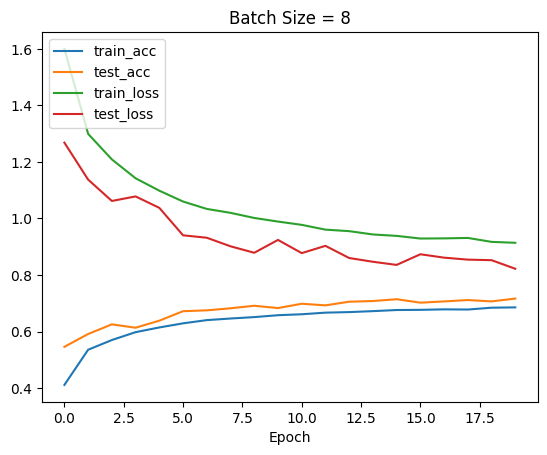

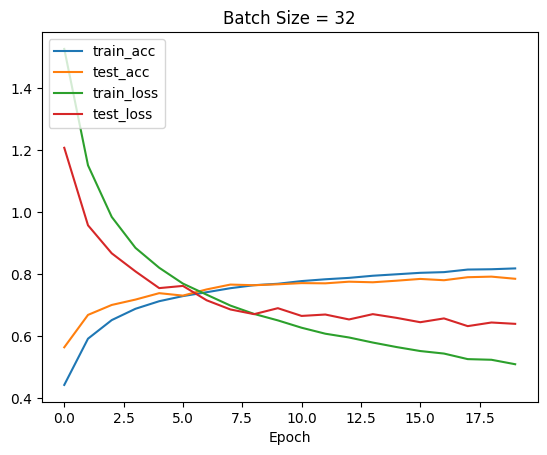

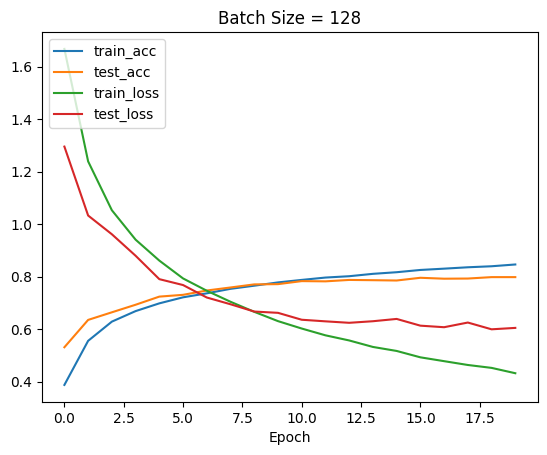

In [8]:
batch_size_list = [8, 32, 128]

for batch_size in batch_size_list:
    model = tf.keras.models.clone_model(base_model)
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=20,
                      validation_data=(x_test, y_test), shuffle=True, verbose=0)
    show_train_history(history, batch_size)

### Task 2
以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

In [9]:
def show_train_history_opt(train_history, opt):
    plt.plot(train_history.history['accuracy'])
    plt.plot(train_history.history['val_accuracy'])
    plt.plot(train_history.history['loss'])
    plt.plot(train_history.history['val_loss'])
    plt.title(opt)
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'test_acc', 'train_loss', 'test_loss'], loc='upper left')
    plt.show()

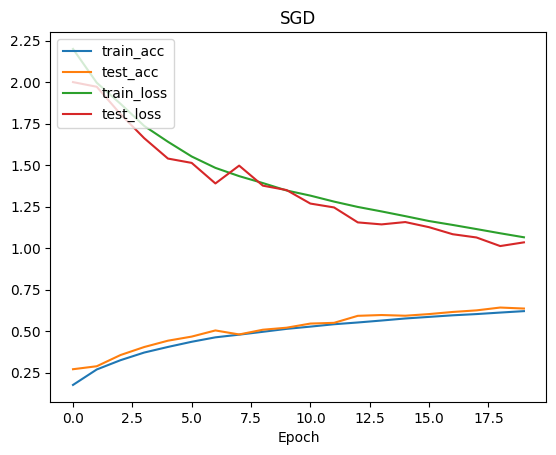

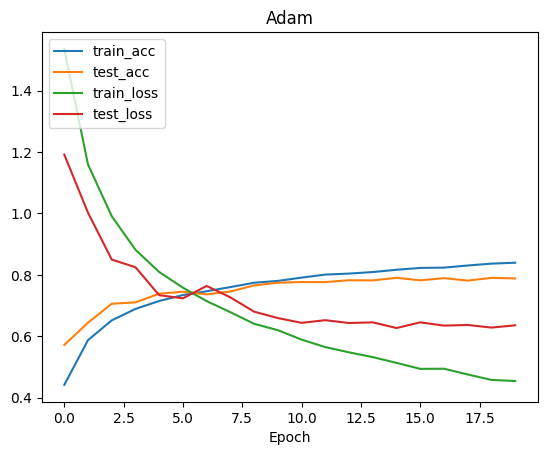

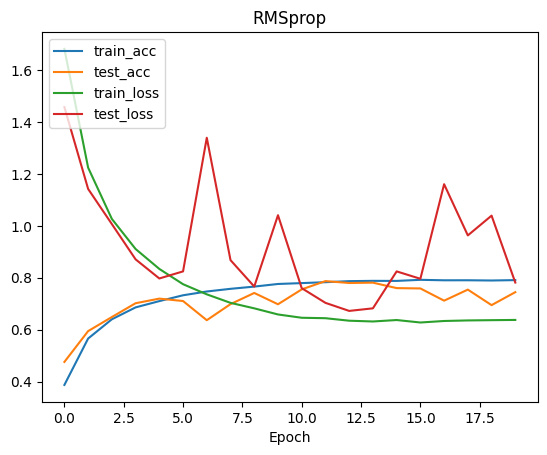

In [10]:
optimizer_list = ['SGD', 'Adam', 'RMSprop']

for opt in optimizer_list:
    model = tf.keras.models.clone_model(base_model)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=64, epochs=20,
                      validation_data=(x_test, y_test), shuffle=True, verbose=0)
    show_train_history_opt(history, opt)
    # tf.keras.backend.clear_session() # release gpu memory